**Table of contents**<a id='toc0_'></a>    
1. [介绍](#toc1_)    
1.1. [基本功能与用法](#toc1_1_)    
1.2. [常见网络的MacroNet公式形式与代码实现](#toc1_2_)    
2. [基本使用](#toc2_)    
2.1. [安装与导入](#toc2_1_)    
2.2. [用法一: 定义和调用函数名带变量的函数](#toc2_2_)    
2.2.1. [一个基于感知机实现XOR运算的例子](#toc2_2_1_)    
2.2.2. [用法二: 使用运算符组织计算流](#toc2_2_2_)    
2.2.3. [用法三: 使用monet集成式构建AI计算流](#toc2_2_3_)    
2.2.4. [一个基于多层感知机训练模型实现XOR运算的例子](#toc2_2_4_)    
3. [例子](#toc3_)    
3.1. [AlexNet](#toc3_1_)    
3.2. [Transformer](#toc3_2_)    
4. [结论与讨论](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

<!-- @format -->

# MacroNet：一个python工具包和一种新型的公式化表述与构建AI网络等计算图的方法

明泳帆，熊丹阳，陈珂鑫，伍逸凡，何晓，李敏

模型可解释性是一个需要特别关注的领域，因为它特别与模型采用和人工智能采用有关。如果用户能够解释深度学习模型产生的决策或预测，他们将采用一个模型和框架。在本章中，您将探索一个名为Captum的新框架，该框架由一组算法组成，这些算法可以解释或帮助我们解释神经网络模型的预测、模型结果和层。在本章中，您还将使用另一个名为skorch的框架，这是一个与Scikit学习用户兼容的库。机器学习用户更喜欢sklearn库来训练模型、执行网格搜索并识别模型的最佳超参数——这与用户在使用PyTorch开发深度神经网络模型时可以体验到的无缝体验相同。


<b>摘要</b>：人工智能模型本质上是从初始输入数据开始构建网络计算流。然而，无论是通过代码构建、文本描述还是图形表示，细节都无法简洁清晰地表达出来。我们的目标是构建一个Python扩展，允许像公式一样表达和编程AI网络流。为此，该工具实现了以下功能：（1）带变量的函数名（m.ddf, m.get）；（2） 公式化的计算流（m.f）；（3） 集成式的计算图（m.net），并将常用的人工智能结构标准化为基于PyTorch的ddf格式。然后，使用上述功能，本文演示了XXX、XXX、XXX等经典网络的构建。该工具增强了函数的拓展能力，提供了基于函数对象的公式化计算能力，将网络结构代码从几十行压缩为几行，大大增强了人工智能模型构建的灵活性和简洁性。本工具可通过```pip install macronet```或者```pip install -q -e  .```安装

<b>关键字</b>：Python；PyTorch；Artificial intelligence; Calculation networks

<!-- @format -->

## 1. <a id='toc1_'></a>[介绍](#toc0_)


现代人工智能（AI）通过机器学习及由其驱动而发展起来的计算机视觉（CV）、自然语言处理（NLP）和语音识别技术（ SRT）等来实现匹配（有监督学习）、决策（强化学习）和生成（无监督学习）等预测与交互任务。数学上，则可以理解为通过一个参数可以通过反馈训练的计算图（AI模型），利用数据驱动的方法求解具有组合结构的复杂高维问题。

当前表述和编程这种计算图的方法显得不够直观与简洁。在现有的论文中，表示这种结构的常用方法为绘制类似电路图的网络图，其虽直观但缺乏规范性与简洁性。在通常的编程中，已有pytorch,tensorflow,keras等工具用以快速构建网络结构，但其通常冗长而不直观，且当需要调整网络的输入输出尺寸时不够便利。AI模型在表述和编程中呈现方式的不一致，为AI模型的理解、实现与调整带来了不便。

我们知道数学、物理、化学等领域中，常常采用精简的公式来表达一个规律。但现有数学公式表示AI模型的方法，其公式同样存在冗长、不直观的问题，不能便利的反映网络的结构、参数和数据形状等信息。为解决这个问题，结合编写AI模型的经验，本文构建了一种新型的公式化表述与构建AI网络等计算图的方法——MacroNet(https://github.com/sumowi/MacroNet.git, https://pypi.org/project/MacroNet/)。

MacroNet是一个python工具包，其将处理数据的基本单元——函数方法视为基本对象，重载了乘法（*）与加法（+）等运算符的以分别在计算图中组织和构建最基础结构——串联与并联的计算方法（flowfunc）。进一步还实现了函数参数的函数名传递（ddf）, 自适应数据尺寸的网络对象（macro）, 与公式形式匹配的构建方法（macronet）。其表述与编程一个AI模型的形式如图1所示。

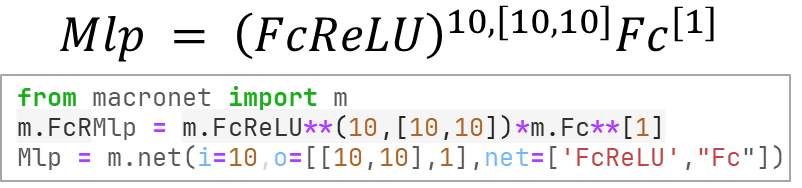
图1：公式形式和代码形式构建MLP模型的MacroNet例子

## 功能与使用
### 1.1. <a id='toc1_1_'></a>[基础使用与例子](#toc0_)

本工具可通过远程pypi```pip install macronet```安装，或者在本地代码库```pip install -q -e  .```安装。MacroNet的目的是像公式一样简化AI神经网络等计算流的构建与表述方式。为此，MacroNet在公式形式的表达和代码形式的编程上，定义了对计算流中单个函数关于数据处理维度（dim）、数据输入（i, input）与输出尺寸(o, output)、函数标记(l,lable)与参数(args)的标准化格式; 此外，采用乘法（*，×）表示顺序串联结构（seq, sequence，上一层的输出将作为下一层的输入顺序迭代），采用加法（+）表示排列并联结构（lay, layout，每一层的输出将排列合并在一起），以简化对函数的连续嵌套与对输出的合并处理；并针对神经网络，进一步简化对输入输出尺寸的设定，详见表1。

表1 MacroNet的基本功能与用法总结

| Content  | Function                    | Sequential               | Layout                   | Net IO                                        |
|----------|-----------------------------|--------------------------|--------------------------|-----------------------------------------------|
| Formula  |$ Func{\overbrace{N}^{dim}}_{l, [\underbrace{(a_1,...,a_n)}_{args}}^{i, \overbrace{[o_1,...,o_n]}^{output\ size}} $| $F = F_1^{i,[o_1]}F_2^{[o_2]} \\= (F_1F_2)^{i,[o1,o2]} $ | $F = F_1^{i,[o_1]}+F_2^{[o_2]}\\ = (F_1+F_2)^{i,(o1,o2)} $ | $F = F_1^{i,[o_1]}F_2^{[o_2]}(F_3^{[o_3]}+F_4^{[o_4]}) \\ = [F_1F_2(F_3+F_4)]^{i,[o1,o2,(o3,o4)]}$|
| Code     | F = Func(i,o, N, dim, args) | F = (F1*F2)**(i,[o1,o2]) | F = (F1+F2)**(i,(o1,o2)) | F = m.net(i, [o1,o2,(o3,o4)],[F1,F2,(F3,F4)]) |
| Output   | y = F(x)                    | y1 = F1(i,o1)(x)         | y1 = F1(i,o1)(x)         | y1 = F1(i,o1)(x)                              |
|          |                             | y = F2(o1,o2)(y1)        | y2 = F2(i,o2)(x)         | y2 = F2(o1,o2)(y1)                            |
|          |                             |                          | y=(y1, y2)               | y3 = F1(o2,o3)(y2)                            |
|          |                             |                          |                          | y4 = F2(o2,o4)(y2)                            |
|          |                             |                          |                          | y=(y3, y4)                                    |

基本使用规则如下：
1. 使用```*```来构建顺序串联结构（seq），使用``+``来构建次序并联结构（lay），代码中使用```m.f```开启一个空白计算流
2. 使用```@m.ddf``` 将普通def函数转换为函数名可变的ddf对象（其中函数名中变量名需与参数变量名一致），然后通过```m.get("name")```匹配式调用，或者```m.内部变量名``` / ```计算流中字符串``` 形式简洁调用
3. 使用```m.net(i,o,net)```更简洁调用```i,o```参数，其中```o,net```可以是```列表（seq结构）```或者```元组（lay结构）```，支持嵌套, 且在```公式```与```m.net```中，只需计算流的第一层定义输入形状```i```
4. 
以实现一个简单的Mlp为例，其公式形式与具体代码使用参考如下：  
$Mlp = (FcReLu)^{10,[10,10]}Fc^{[1]} $

In [15]:
%pip install -q macronet
from macronet import m,nn

# @m.ddf 定义ddf对象，Act为函数名可变参数
@m.ddf
def FcAct(i,o,Act=""):
    return (m.f*nn.Linear(i,o)*eval(f"nn.{Act}()") if Act!="" \
        else m.f*nn.Linear(i,o))

# m.name 获取ddf对象，并通过name传递参数
Input = m.FcReLU(10,10)
Hidden = m.FcReLU(10,10)
Out = m.Fc(10,1)
Mlp = Input*Hidden*Out

# flowfunc 传递i,o流
Mlp = m.FcReLU**(10,[10,10])*m.Fc**[1]

# m.net 整合i,o流, 使用[]/()构建seq/lay计算流
Mlp = m.net(i=10,o=[[10,10],1],net=['FcReLU',"Fc"])
Mlp

Note: you may need to restart the kernel to use updated packages.


seq(
  (0-cell): seq(
    (0:FcReLU): @macro:seq(
      (0): @ddf:Linear(in_features=10, out_features=10, bias=True)^(*args, **kwargs){} *id:2695533446096
      (1): @ddf:ReLU()^(*args, **kwargs){} *id:2695533445952
    )^(*args, **kwargs) -> Any{} *id:2695533447440
    (1:FcReLU): @macro:seq(
      (0): @ddf:Linear(in_features=10, out_features=10, bias=True)^(*args, **kwargs){} *id:2695533447488
      (1): @ddf:ReLU()^(*args, **kwargs){} *id:2695533447392
    )^(*args, **kwargs) -> Any{} *id:2695533448832
  )
  (1:Fc): @macro:seq(
    (0): @ddf:Linear(in_features=10, out_features=1, bias=True)^(*args, **kwargs){} *id:2695533448640
  )^(*args, **kwargs) -> Any{} *id:2695533446816
)

### ddf批定义与预定义
批量定义ddf对象有以下几种方式：
1. 在单独文件中定义大量def函数，分别加上@m.ddf进行修饰
2. 采用funcspace字典，分为name模式与value模式
3. 在class中定义大量def函数，直接修饰整个class

In [5]:
from macronet import m,nn
m.ddf({"FcAct":lambda i,o,Act="":
    m.f*nn.Linear(i,o)*eval(f"nn.{Act}()") if Act!="" else
    m.f*nn.Linear(i,o)})

m.ddf({"Fc_ReLU":lambda i,o,Act:
    m.f*nn.Linear(i,o)*eval(f"nn.{Act}()") if Act!="" else
    m.f*nn.Linear(i,o)})

m.ddf({"FcAct":lambda Act="": lambda i,o:
    m.f*nn.Linear(i,o)*eval(f"nn.{Act}()") if Act!="" else
    m.f*nn.Linear(i,o)})

m.ddf({"Fc_ReLU":lambda Act: lambda i,o:
    m.f*nn.Linear(i,o)*eval(f"nn.{Act}()") if Act!="" else
    m.f*nn.Linear(i,o)})

m.net("Fc")

d:\Code\SkorchAI\src\MacroNet\.venv\lib\site-packages\torch\nn\init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


seq(
  (0:Fc): @macro:seq(
    (0): @ddf:Linear(in_features=0, out_features=1, bias=True)^(*args, **kwargs){} *id:2042337115776
    (1): @ddf:ReLU()^(*args, **kwargs){} *id:2042337107472
  )^(*args, **kwargs) -> Any{} *id:2042964933888
)


基于pytorch的预定义内容：

| 公式      | 带参公式             | 带参代码         | 含义           | 实现                                                                                                                            |
| --------- | -------------------- | ---------------- | -------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| $Fc$      | $Fc_{true}^{o}$      | fc_True          | 全连接层       | `nn.Linear(in_features=i,out_features=o,bias=bias)`                                                                             |
| $Bfc$     | $Bfc_{true}^{o}$     | bfc_True         | 双线性层       | `nn.Bilinear(in1_features=i[0],in2_features=i[1],out_features=o,bias=bias)`                                                     |
| $Fl   $   | $Fl_{1,-1}^o$        | flat_1_-1        | 压扁层         | `nn.Flatten(start_dim=start_dim,end_dim=end_dim)`                                                                               |
| $Cv     $ | $Cv2_{3,1,0,true}^o$ | cov2_3_1_0_True  | 卷积层         | `eval(f"nn.Conv{dim}d")(in_channels=i,out_channels=o,kernel_size=kernel_size,`                                                  |
| $Cvt$     | $Cvt2$               | covT2_3_1_0_True | 反卷积层       | `eval(f"nn.ConvTranspose{dim}d")(in_channels=i,out_channels=o,kernel_size=kernel_size,stride=stride,padding=padding,bias=bias)` |
| $Mp$      | $Mp2$                | mp2_2_0          | 最大池化       | `eval(f"nn.MaxPool{dim}d")(kernel_size=kernel_size,padding=padding)`                                                            |
| $Amp$     | $Mpa2$               | amp2_2_0         | 自适应最大池化 | `eval(f"nn.AdaptiveMaxPool{dim}d")(kernel_size=kernel_size,padding=padding)`                                                    |
| $Ap$      | $Ap2$                | ap2_2            | 平均池化       | `eval(f"nn.AvgPool{dim}d")(padding=padding)`                                                                                    |
| $Aap $    | $Apa2$               | aap2_2           | 自适应平均池化 | `eval(f"nn.AdaptiveAvgPool{dim}d")(padding=padding)`                                                                            |
| $Bn  $    | $Bn1$                | bn1_0            | 批归一化层     | `eval(f"nn.BatchNorm{dim}d")(num_features=i if num_features==0else num_features)`                                               |
| $In$      | $In1$                | in1_0            | 归一化层       | `eval(f"nn.InstanceNorm{dim}d")(num_features=i if num_features==0else num_features)`                                            |
| $Gn   $   | $Gn$                 | gn_2             | 组归一化层     | `nn.GroupNorm(num_groups=num_groups,num_channels=i)`                                                                            |
| $Ln $     | $Ln$                 | ln               | 归一化层       | `nn.LayerNorm(normalized_shape=i)`                                                                                              |
| $Lrn   $  | $Lrn$                | lrn              | 归一化层       | `nn.LocalResponseNorm(size=i)`                                                                                                  |
| $Dp    $  | $Dp$                 | dp_0.5_False     | 隐藏层         | `nn.Dropout(p=p,inplace=bool(inplace))`                                                                                         |
| $Dp   $   | $Dp1$                | dp1_1_False      | 隐藏层         | `eval(f"nn.Dropout{dim}d")(p=p,inplace=bool(inplace))`                                                                          |
| $Adp    $ | $Adp$                | aldp_0.5_False   | 隐藏层         | `nn.AlphaDropout(p=p,inplace=bool(inplace))`                                                                                    |
| $Fadp  $  | $Fadp$               | fadp_0.5_False   | 隐藏层         | `nn.FeatureAlphaDropout(p=p,inplace=bool(inplace))`                                                                             |
| $Act  $   | $Act$                | act.PReLU        | 激活层         | `eval(f"nn.{act_func}")()`                                                                                                      |
| $Nn $     | $Nn$                 | nn.Linear_(10,1) | 通配层         | `eval(f"nn.{func}")(*args)`                                                                                                     |

### 1.2. <a id='toc1_2_'></a>[常见网络的MacroNet公式形式与代码实现](#toc0_)

<!-- @format -->

### 2.1. <a id='toc2_1_'></a>[安装与导入](#toc0_)


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<!-- @format -->

### 2.2. <a id='toc2_2_'></a>[用法一: 定义和调用函数名带变量的函数](#toc0_)
本工具定义了两个基本接口来分别实现定义（ddf）和调用(get)。定义时需指定函数名和函数；调用时则直接将函数名对应位置替换为具体的值即可。所有定义的函数将以字典形式存储在monet对象的funcspace中，调用时将先匹配并注册到namespace中。


| API | 说明  | 例子 |
| ------- | -------------| ------- |
| m.ddf <br> @m.ddf  | 定义一个函数名带变量的的函数，传入一个新名字和函数，或者传入一个已定义的函数; <br> 注：本接口支持修饰器用法 <br> 会在控制台打印定义的函数与默认参数     | `m.ddf("name",callable)`<br>`m.ddf(callable)`<br>`@m.ddf` |
| m.get   | 调用一个新的函数,传入一个赋值对应变量的函数名| `m.get("name")`    |

更简化的方法可以省略ddf和get接口，支持使用m的字典、成员、参数化形式，简化方法调用函数时不会打印匹配信息。
| API | 说明  | 例子 |
| ------- | -------------| ------- |
| m["name"]   | 字典化形式，可定义和调用，函数名支持任意字符| `ddf: m['name+arg'] = ...`<br>`get: m['name+1']` |
| m.name   | 成员化形式，可定义和调用，函数名支持下划线、字幕和数字| `ddf: m.name_arg = ...`<br>`get: m.name_1` |
| m() <br> @m   | 参数化形式，可定义和调用，函数名支持任意字符; <br>支持修饰器用法| `ddf: m("name+arg", callable) ` <br> `ddf: @m` <br>`get: m("name+1")` |

其中函数名可采用变量名模式或者默认值模式，具体规则如下：
- 变量名模式
  - 将参数列表中的参数名定义在函数名的任意非起始位置
  - 多个变量名之间必须要间隔其他字符
  - 将按函数参数列表中的参数顺序对函数名中的变量依次识别
- 默认值模式
  - 函数名<数字>.<字符串>_<值>
  - 该模式中 . _ 可以多次使用或者不适用
  - 数字参数可以使用或者不使用，但只能用一次
  - 该模式将按参数列表后置位等量参数匹配


#### 2.2.1. <a id='toc2_2_1_'></a>[一个基于感知机实现XOR运算的例子](#toc0_)
本代码演示了如何使用Monet库中的@m.ddf修饰器将普通函数转换为嵌入式变量函数，并使用这些函数来实现逻辑门的功能。在代码中，定义了一个pla_Type函数来模拟逻辑门的行为，然后使用@m.ddf修饰器将其转换为嵌入式变量函数。接着通过不同的方式获取新的函数，并定义了XOR函数来展示如何通过组合和运算符来创建新的函数。通过运行代码，我们得到了XOR函数的输出结果为(False, False, True, True)。这表明代码成功实现了逻辑门的功能，并且通过Monet库提供的功能实现了函数的组合和运算。

```mermaid 
flowchart TB
  subgraph 2817608955600[0:@ddf:pla_OR: lay]
    input -- pla_OR\n  (_x, Type){'Type': 'OR'}--> 2819129246048((0:pla_OR))
    input -- pla_NAND\n  (_x, Type){'Type': 'NAND'}--> 2819129245904((1:pla_NAND))
  end
  2819129246048((0:pla_OR)) -- pla_AND\n  (_x, Type){'Type': 'AND'}--> 2819129252528((1:pla_AND))
  2819129245904((1:pla_NAND)) -- pla_AND\n  (_x, Type){'Type': 'AND'}--> 2819129252528((1:pla_AND))
  2819129252528((1:pla_AND)) --> output
```

In [1]:
# m.ddf recive a (Callable) or a (name , Callable)
# and you can add the top of an def function with @m.ddf or @m.ddf(new_name)
from macronet import m

# Using a modifier to convert a regular function to an embedded variable function name function
@m.ddf # 也可以直接@m,但是推荐使用@m.ddf
# 函数名中的变量名要与参数中对应变量名一致
def pla_Type(_x, Type):
    wb = {
        "AND": [[0.5, 0.5], -0.7],
        "OR": [[0.5, 0.5], -0.2],
        "NAND": [[-0.5, -0.5], 0.7],
        "NOT": [[-1], 0.5],
    }
    _w, b = wb[Type]
    y = sum(w_i * x_i for w_i, x_i in zip(_w, _x)) + b
    y = y if y > 0 else 0  # relu
    return y > 0

# 等价于以下两种方式,推荐使用@m.ddf
m.ddf("pla_Type",pla_Type)
m.ddf(pla_Type)

# four mode to get the new defdef function.
# get mode will print the finded defdef function
AND = m.get("pla_AND")
OR = m["pla_OR"]
NAND = m.pla_NAND
NOT = m("pla_NOT")

# define the defdef function flow by + and *
# more information at bellow
XOR = (OR + NAND) *AND
XOR([1, 1]), XOR([0, 0]), XOR([0, 1]), XOR([1, 0])

pla_AND ('pla_Type', {'Type': 'AND'})


(False, False, True, True)

<!-- @format -->

#### 2.2.2. <a id='toc2_2_2_'></a>[用法二: 使用运算符组织计算流](#toc0_)
本部分功能实现在monet.flowfuunc中，并定义了3种基本操作逻辑：串联（seq）,并联（lay）,串接（cat），分别采用\*,+,&运算符表示。此外~表示深度拷贝一个新对象，\*\*表示\*的深度拷贝重复。具体规则如下：
- 任意计算流从m.f开始,采用用法一中的方法ddf化的函数对象，可以省略m.f作为起始，因为m.f本质上是一个空的ddf函数对象。
- 运算符后可以接ddf函数对象、数字、函数对象列表或元组。并且支持直接使用字符串获取ddf函数对象。
- \*后为数字时，表示为+运算的重复；+后为数字时，表示添加对应数目个空ddf函数对象，数字1即表示一个空ddf函数对象。
- \*,\*\*,+后接数字时，重复的对象将被深度拷贝为新对象。
- 当\*\*后接ddf函数对象（包括字符串形式）时，与\*~是等价的，即以深度拷贝模式串联。
- 如果要使用非拷贝重复，可以采用列表后接\*与数字的方法。

相应的说明与示例见下表。

| 操作 | 说明   | 效果   |
| ---- | ---- | -----------|
| **m.f**    | 空ddf对象，用以作为计算流的开始；<br> 可以传入一个字符串，将本计算流以该名称注册到funcspace空间中| `m.f` <br> `m.f("name")`|
| **\*/[]**   | 串联两个函数，使得上一个函数的输出作为下一个函数的输入,与使用列表效果一样 | `(A*B)(x) -> B(A(x))`<br>`(A*3)(x) -> (A+~A+~A)(x)`             |
| **+/()**    | 并联两个函数，使得其输出拼接在一起,与使用元组效果一样| `(A+B)(x) -> (A(x), B(x))`<br>`(A+3)(x) -> (A(x), x, x, x)` |
| **%/&**  | 并联两个函数，使得其输出在0:vstack/1:hstack维度上并接在一起| `(A%B)(x) -> [*A(x), *B(x)]`<br>`(A%3)(x) -> [*A(x), *x, *x ]` <br> `(A&B)(x) -> [*A(x).T, *B(x).T]`<br>`(A&3)(x) -> [*A(x).T, *x.T, *.T ]`              |
| **\*\*** | 后为数字时表示串联的重复，后为ddf函数对象时表示深度拷贝串联模式 | `(A**A)(x) -> ~A(A(x))`<br>`(A**3)(x) -> [A(x), ~A(x), ~A(x)]`     |
| **~** | 单目运算符，返回一个深度拷贝对象 | `~A -> copy.deepcopy(A)`|

#### 2.2.3. <a id='toc2_2_3_'></a>[用法三: 使用monet集成式构建AI计算流](#toc0_)


| API与参数 |  用法   | 说明   |
| ---- | ---- | -----------|
| m.net(i,o_list,net_list) | i: 输入维度 <br> o_list: 输出维度  <br> net_list: 网络列表| []表示seq结构<br>()表示lay结构|
| m.net(net_list) | 可以不定义输入输出维度，通过运行一遍输入后自动更新维度 | net可以是对象或者字符串形式的对象 |
| m.reset_parameters() | 对可以重置参数的层重新初始化 | ~拷贝的对象参数是一样的，需要情况下重新初始化后会变成不一样 |
| m.mermaid() | md格式的网络结构 | 可以可视化的网络结构 |

#### 2.2.4. <a id='toc2_2_4_'></a>[一个基于多层感知机训练模型实现XOR运算的例子](#toc0_)

所提供的代码演示了使用不同方法实现神经网络：传统PyTorch、flowfunc和monet。该代码包括神经网络架构的定义、回归和分类任务的训练以及预测。  
PyTorch实现定义了一个具有特定层和激活函数的神经网络类。然后，它使用skarch库来训练用于回归和分类任务的网络。  
flowfunc实现使用monet库以更简洁、更实用的方式定义神经网络架构，利用库的功能创建代码行更少的神经网络。  
monet实现直接使用monet库来定义神经网络架构，展示了该库用于定义复杂神经网络的简单性和简洁性。  
总的来说，该代码演示了定义和训练神经网络的不同方法的使用，强调了使用flowfunc和monet等库进行简洁和表达的神经网络定义的好处。

网络结构（mermaid）：
```mermaid 
flowchart TB
      input -- Linear(in_features=2, out_features=1, bias=True)\n  (*args, **kwargs){}--> 2479872503920((0:fc))
  subgraph 2478922548800[0-group: lay]
    subgraph 2478922547360[0-cell: seq]
      2479872503920((0:fc)) -- PReLU(num_parameters=1)\n  (*args, **kwargs){}--> 2478939965568((1:act))
    end
      input -- Linear(in_features=2, out_features=1, bias=True)\n  (*args, **kwargs){}--> 2478939965712((0:fc))
    subgraph 2478921180944[1-cell: seq]
      2478939965712((0:fc)) -- PReLU(num_parameters=1)\n  (*args, **kwargs){}--> 2478939969168((1:act))
    end
  end
  2478939965568((1:act)) -- <lambda>\n  (input, dim=1){}--> 2478922547504((1:cat))
  2478939969168((1:act)) -- <lambda>\n  (input, dim=1){}--> 2478922547504((1:cat))
    2478922547504((1:cat)) -- Linear(in_features=2, out_features=1, bias=True)\n  (*args, **kwargs){}--> 2478939969120((0:fc))
  subgraph 2478922548608[2-cell: seq]
    2478939969120((0:fc)) -- PReLU(num_parameters=1)\n  (*args, **kwargs){}--> 2478939969552((1:act))
  end
  2478939969552((1:act)) --> output
```

In [2]:
from macronet import m,nn
import torch

# 基于pytorch的写法，需数十行
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.act = nn.Sigmoid()
        self.ppn1 = nn.Sequential(
            nn.Linear(2, 1),
            self.act)
        self.ppn2 = nn.Sequential(
            nn.Linear(2, 1),
            self.act)
        self.ppn3 = nn.Sequential(
            nn.Linear(2, 1),
            self.act)

    def forward(self, x):
        y1 = self.ppn1(x)
        y2 = self.ppn2(x)
        x3 = torch.cat([y1, y2], dim=1)
        y3 = self.ppn3(x3)
        return y3

mlp = net()

# 基于flowfunc的写法，只需数行
cat = m.f("cat") * (lambda x: torch.cat(x, dim=1)) # 把m.f后的计算流注册为名为cat的ddf对象
pla = m.f("pla") * nn.Linear(2, 1) * nn.Sigmoid() # Perceptron Learning Algorithm，m.f代表一个空的ddf对象
mlp = (pla * 2) * "cat" * ~pla # 这里可以不用m.f开头，因为起始函数ppn已经是一个ddf对象
# 等价于
# mlp = (pla+~pla) * "cat" * "~pla"

# 基于macronet的写法,更加简洁
mlp = m.net(2,
            [(1, 1), 2, 1],
            [["fc", "act"], cat , ["fc", "act"]])
# print(mlp.mermaid()) # 打印网络的mermaid格式结构，一种可以在markdown中可视化的格式
mlp

seq(
  (0-group): loc(
    (0-cell): seq(
      (0:fc): @macro:Linear(in_features=2, out_features=1, bias=True)^(*args, **kwargs){} *id:1629567403296
      (1:act): @macro:PReLU(num_parameters=1)^(*args, **kwargs){} *id:1629567415632
    )
    (1-cell): seq(
      (0:fc): @macro:Linear(in_features=2, out_features=1, bias=True)^(*args, **kwargs){} *id:1628047884400
      (1:act): @macro:PReLU(num_parameters=1)^(*args, **kwargs){} *id:1628047886464
    )
  )
  (1:cat): @macro:<lambda>^(x){} *id:1629567155024
  (2-cell): seq(
    (0:fc): @macro:Linear(in_features=2, out_features=1, bias=True)^(*args, **kwargs){} *id:1628047900576
    (1:act): @macro:PReLU(num_parameters=1)^(*args, **kwargs){} *id:1628047899376
  )
)

In [8]:
# 训练神经网络，以回归任务方式训练
from skorch import NeuralNetRegressor as Reg
from torch import Tensor, optim

y_reg: Tensor = Tensor([[0], [0], [1], [1]]).float()
x = Tensor([[1, 1], [0, 0], [0, 1], [1, 0]]).float()
model = Reg(mlp,
            optimizer=optim.Adam,
            train_split=None, verbose=0)

# mlp.reset_parameters()
model.fit(x, y_reg,epochs=200)
model.predict(X=x)

array([[-6.7725217e-08],
       [-4.1504777e-08],
       [ 1.0000010e+00],
       [ 1.0000008e+00]], dtype=float32)

In [9]:
# 训练神经网络，以分类任务方式训练
from skorch import NeuralNetBinaryClassifier as Cls
from torch import Tensor, optim

y_cls: Tensor = Tensor([0, 0, 1, 1]).float()
x = Tensor([[1, 1], [0, 0], [0, 1], [1, 0]]).float()
model = Cls(mlp,
            optimizer=optim.NAdam,
            train_split=None, verbose=0)

# mlp.reset_parameters()
model.fit(x, y_cls,epochs=200)
model.predict(x), model.predict_proba(x)

(array([0, 0, 1, 1], dtype=uint8),
 array([[0.98531586, 0.01468412],
        [0.9935407 , 0.00645931],
        [0.01970291, 0.9802971 ],
        [0.0217247 , 0.9782753 ]], dtype=float32))

<!-- @format -->

## 3. <a id='toc3_'></a>[例子](#toc0_)


### 3.1. <a id='toc3_1_'></a>[AlexNet](#toc0_)
lexNet中包含了几个比较新的技术点，也首次在CNN中成功应用了ReLU、Dropout和LRN等Trick。同时AlexNet也使用了GPU进行运算加速。AlexNet将LeNet的思想发扬光大，把CNN的基本原理应用到了很深很宽的网络中。

<div style="text-align: center;">
 <img src="https://p1-jj.byteimg.com/tos-cn-i-t2oaga2asx/gold-user-assets/2019/8/24/16cc3c8d1a280892~tplv-t2oaga2asx-jj-mark:3024:0:0:0:q75.png" alt="Your Image" style="display: block; margin: 0 auto;" />
</div>

In [5]:
import torch
from macronet import m,nn

# 传统写法
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LocalResponseNorm(96),

            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LocalResponseNorm(256),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
AlexNet()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): LocalResponseNorm(96, alpha=0.0001, beta=0.75, k=1.0)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): LocalResponseNorm(256, alpha=0.0001, beta=0.75, k=1.0)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (

In [18]:
import torch
from macronet import m,nn

# 传统写法
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = m.net(3,[96,256,[384,384,256],0],
      [["cv_11_4_2","relu","mp_3_2_0","lrn"],
       ["cv_5_1_2","relu","mp_3_2_0","lrn"],
       [["cv_3_1_1","relu"]],"mp_3_2_0"])

        self.avgpool = m.net(["aap_(6,6)","fl"])

        self.classifier = m.net(0,[[4096,4096],1000],
                   [[["dp","fc","relu"]],"fc"])

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = self.classifier(x)
        return x
AlexNet()

AlexNet(
  (features): seq(
    (0-cell): seq(
      (0:cv): @macro:Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))^(*args, **kwargs){} *id:2003397914784
      (1:relu): @macro:ReLU()^(*args, **kwargs){} *id:2003398268464
      (2:mp): @macro:MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)^(*args, **kwargs){} *id:2003397907200
      (3:lrn): @macro:LocalResponseNorm(96, alpha=0.0001, beta=0.75, k=1.0)^(*args, **kwargs){} *id:2003397917184
    )
    (1-cell): seq(
      (0:cv): @macro:Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))^(*args, **kwargs){} *id:2003397913152
      (1:relu): @macro:ReLU()^(*args, **kwargs){} *id:2003400004400
      (2:mp): @macro:MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)^(*args, **kwargs){} *id:2003397913392
      (3:lrn): @macro:LocalResponseNorm(256, alpha=0.0001, beta=0.75, k=1.0)^(*args, **kwargs){} *id:2003397916608
    )
    (2-group): seq(
      (0-cell): s

In [33]:
m.cvi_o= lambda i=3,o=96 : nn.Conv2d(i, o, kernel_size=11, stride=4, padding=2)
m.get("cv5_88")

cv5_88 ('cv2_3_1_0', {'Ndim': 5, 'kernel_size': 88, 'stride': 1, 'padding': 0})


@ddf:cv5_88^(i, o){} *id:1628084253264

In [22]:
m.net("dp__True")

seq(
  (0:dp): @macro:Dropout(p=0.5, inplace=True)^(*args, **kwargs){} *id:1628083308048
)

In [45]:
# flowfunc+monet写法
from macronet import m,nn
import torch
# 在i/o_list中，0意味着无需此参数或者自动获取此参数
features = m.net(3,[96,300,[384,384,256],0],
      [["cv_11_4_2","relu","mp_3_2_0","lrn"],
       ["cv_5_1_2","relu","mp_3_2_0","lrn"],
       [["cv_3_1_1","relu"]],"mp_3_2_0"])
avgpool = m.net(["aap_(6,6)","fl"])
classifier = m.net(0,[[4096,4096],2000],
                   [[["dp","fc","relu"]],"fc"])
AlexNet = features*avgpool*classifier
# 测试能否自动更新输入输出
print(AlexNet(torch.randn([2,3,224,224])).size())
# AlexNet

[Info] Input size=96 is not match, reset to 27:
27 seq [96] ['lrn']
┗━ 27 -> net : 96 lrn
-> 96
[Info] Input size=300 is not match, reset to 13:
13 seq [300] ['lrn']
┗━ 13 -> net : 300 lrn
-> 300
[Info] Input size=4096 is not match, reset to 9216:
9216 seq [4096] ['fc']
┗━ 9216 -> net : 4096 fc
-> 4096
torch.Size([2, 2000])


公式写法

\begin{array}{c}
Features = (Cv_{(11,4,2)}ReluMp_{(3,2,0)}Lrn)_{[3]}^{[96]} \\
(Cv_{(5,1,2)}ReluMp_{(3,2,0)}Lrn)^{[256]} \\
(Cv_{(3,1,1)}Relu)^{[384,384,256]}Mp_{(3,2,0)} \\
\end{array}

\begin{array}{c}
Avgpool = Aap_{(6,6)}Fl
\end{array}

\begin{array}{c}
Classifier = (DpFcRelu)^{[4096,4096]}Fc^{[1000]}
\end{array}

\begin{array}{c}
AlexNet = FeaturesAvgpoolClassifier
\end{array}

\begin{array}{c}
Features = (Cv2_{(11,4,2)}*Relu*Mp2_{(3,2,0)}*Lrn)^{3,[96]} \\
[Cv_{(5,1,2)}ReluMp_{(3,2,0)}Lrn]^{[256]} \\
(Cv_{(3,1,1)}Relu)^{[384,384,256]}Mp_{(3,2,0)} \\
\end{array}

\begin{array}{c}
Avgpool = Aap_{(6,6)}Fl
\end{array}

\begin{array}{c}
Classifier = (DpFcRelu)^{[4096,4096]}Fc^{[1000]}
\end{array}

\begin{array}{c}
AlexNet = FeaturesAvgpoolClassifier
\end{array}

\begin{array}{c}

FcFc^{[100]}Act = (Fc^2)^{[100,30]}Act

\end{array}

公式写法

\begin{array}{c}
Features = (CvReluMpLrn)^2(CvRelu)^3Mp\\
\end{array}

\begin{array}{c}
Avgpool = Aap_{(6,6)}Fl
\end{array}

\begin{array}{c}
Classifier = (DpFcRelu)^2Fc
\end{array}

\begin{array}{c}
AlexNet = FeaturesAvgpoolClassifier
\end{array}

公式写法

\begin{array}{c}
Features = (Cv_{11,4,2}ReluMp_{3,2,0}Lrn)^{[3,96]} \\
\int^{256}Cv_{5,1,2}ReluMp_{3,2,0}Lrn \\
\int^{384,384,256}Cv_{3,1,1}Relu\int Mp_{3,2,0} \\
\end{array}

\begin{array}{c}
Avgpool = \int Aap_{(6,6)}Fl
\end{array}

\begin{array}{c}
Classifier = \int_0^{4096,4096}DpFcRelu\int^{1000}Fc
\end{array}

\begin{array}{c}
AlexNet = FeaturesAvgpoolClassifier
\end{array}

In [43]:
import torch
from macronet import m,nn

# 与传统写法可以灵活混用
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        cv1= nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
        cv2 = nn.Conv2d(96, 256, kernel_size=5, padding=2)
        cv3 = nn.Conv2d(256, 384, kernel_size=3, padding=1)
        mp = nn.MaxPool2d(kernel_size=3, stride=2)
        relu = nn.ReLU(inplace=True)
        lrn = nn.LocalResponseNorm(96)

        self.features = m.f*[
            cv1, relu, mp, lrn,
            cv2, relu, mp, lrn,
            cv3, relu,
            cv3, relu,
            cv3, relu,
            mp
        ]

        aap = nn.AdaptiveAvgPool2d((6, 6))
        fl = lambda x : torch.flatten(x, 1)
        self.avgpool = m.f*aap*fl

        dp = nn.Dropout()
        m.fc_i_o = lambda i,o : nn.Linear(i,o)
        self.classifier = m.f*[
            dp,m['fc_256 * 6 * 6_4096'],relu,
            dp,m.fc_4096_4096,relu,
            m.fc_4096_1000
        ]

    def forward(self, x):
        x = (self.features*self.avgpool*self.classifier)(x)
        return x
AlexNet()

AlexNet(
  (features): seq(
    (0): seq(
      (0): seq(
        (0): @ddf:Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))^(*args, **kwargs){} *id:1628062158944
      )
      (1): @ddf:ReLU(inplace=True)^(*args, **kwargs){} *id:1628062341664
      (2): @ddf:MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)^(*args, **kwargs){} *id:1628084317840
      (3): @ddf:LocalResponseNorm(96, alpha=0.0001, beta=0.75, k=1.0)^(*args, **kwargs){} *id:1628062341184
      (4): @ddf:Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))^(*args, **kwargs){} *id:1628062160576
      (5): @ddf:ReLU(inplace=True)^(*args, **kwargs){} *id:1628062341664
      (6): @ddf:MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)^(*args, **kwargs){} *id:1628084317840
      (7): @ddf:LocalResponseNorm(96, alpha=0.0001, beta=0.75, k=1.0)^(*args, **kwargs){} *id:1628062341184
      (8): @ddf:Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), pa

```mermaid 
flowchart TB
  subgraph 1628083479616[0:net: seq]
    input -- Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))\n  (*args, **kwargs){}--> 1628098681520((0:cv))
  subgraph 1628083479616[0:net: seq]
    1628098681520((0:cv)) -- ReLU()\n  (*args, **kwargs){}--> 1628098680752((1:relu))
    1628098680752((1:relu)) -- MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)\n  (*args, **kwargs){}--> 1628080111920((2:mp))
    1628080111920((2:mp)) -- method\n  (*args, **kwargs) -> Any{}--> 1628080114176((3:lrn))
  end
  subgraph 1628080112784[1:net: seq]
    1628080114176((3:lrn)) -- Conv2d(96, 300, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))\n  (*args, **kwargs){}--> 1628083481584((0:cv))
  subgraph 1628080112784[1:net: seq]
    1628083481584((0:cv)) -- ReLU()\n  (*args, **kwargs){}--> 1628062357664((1:relu))
    1628062357664((1:relu)) -- MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)\n  (*args, **kwargs){}--> 1628062356320((2:mp))
    1628062356320((2:mp)) -- method\n  (*args, **kwargs) -> Any{}--> 1628080251392((3:lrn))
  end
  subgraph 1628080111728[2:net: seq]
    subgraph 1628080252784[0-cell: seq]
  subgraph 1628080111728[2:net: seq]
      1628080251392((3:lrn)) -- Conv2d(300, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n  (*args, **kwargs){}--> 1628083111344((0:cv))
    subgraph 1628080252784[0-cell: seq]
      1628083111344((0:cv)) -- ReLU()\n  (*args, **kwargs){}--> 1628098682000((1:relu))
    end
    subgraph 1628080255616[1-cell: seq]
      1628098682000((1:relu)) -- Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n  (*args, **kwargs){}--> 1628083302848((0:cv))
    subgraph 1628080255616[1-cell: seq]
      1628083302848((0:cv)) -- ReLU()\n  (*args, **kwargs){}--> 1628083306160((1:relu))
    end
    subgraph 1628080248752[2-cell: seq]
      1628083306160((1:relu)) -- Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n  (*args, **kwargs){}--> 1628061397776((0:cv))
    subgraph 1628080248752[2-cell: seq]
      1628061397776((0:cv)) -- ReLU()\n  (*args, **kwargs){}--> 1628083302800((1:relu))
    end
  end
  1628083302800((1:relu)) -- MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)\n  (*args, **kwargs){}--> 1628098683536((3))
  subgraph 1628098688048[4:net: seq]
    1628098683536((3)) -- AdaptiveAvgPool2d(output_size=(6, 6))\n  (*args, **kwargs){}--> 1628080254128((0:aap))
  subgraph 1628098688048[4:net: seq]
    1628080254128((0:aap)) -- Flatten(start_dim=1, end_dim=-1)\n  (*args, **kwargs){}--> 1628080249808((1:fl))
  end
  subgraph 1628080459776[5:net: seq]
    subgraph 1628080461984[0-group: seq]
  subgraph 1628080459776[5:net: seq]
      subgraph 1628062357088[0-cell: seq]
    subgraph 1628080461984[0-group: seq]
        1628080249808((1:fl)) -- Dropout(p=0.5, inplace=False)\n  (*args, **kwargs){}--> 1628083479328((0:dp))
      subgraph 1628062357088[0-cell: seq]
        1628083479328((0:dp)) -- method\n  (*args, **kwargs) -> Any{}--> 1628080114080((1:fc))
        1628080114080((1:fc)) -- ReLU()\n  (*args, **kwargs){}--> 1628061396960((2:relu))
      end
      subgraph 1628083478224[1-cell: seq]
        1628061396960((2:relu)) -- Dropout(p=0.5, inplace=False)\n  (*args, **kwargs){}--> 1628061395040((0:dp))
      subgraph 1628083478224[1-cell: seq]
        1628061395040((0:dp)) -- Linear(in_features=4096, out_features=4096, bias=True)\n  (*args, **kwargs){}--> 1628061398304((1:fc))
        1628061398304((1:fc)) -- ReLU()\n  (*args, **kwargs){}--> 1628061394032((2:relu))
      end
    end
    1628061394032((2:relu)) -- Linear(in_features=4096, out_features=2000, bias=True)\n  (*args, **kwargs){}--> 1628061396288((1:fc))
  end
  1628061396288((1:fc)) --> output
```

### 3.2. <a id='toc3_2_'></a>[Transformer](#toc0_)

<!-- @format -->

Transformer 内部结构从头实现


<!-- @format -->

```plaintext
Transformer内部结构主要包括以下几个部分：
1. 输入嵌入层（Input Embedding Layer）：将输入的token序列转换为词嵌入向量表示。
2. 位置编码（Positional Encoding）：为输入的token序列添加位置信息，以便模型能够区分不同位置的词。
3. 编码器（Encoder）：由多个编码器层组成，每个编码器层包括自注意力机制和前馈神经网络。
4. 解码器（Decoder）：由多个解码器层组成，每个解码器层包括自注意力机制、编码器-解码器注意力机制和前馈神经网络。
5. 多头注意力机制（Multi-Head Attention）：用于捕捉输入序列中不同位置之间的依赖关系。
6. 前馈神经网络（Feed-Forward Neural Network）：在每个编码器和解码器层中都包含一个前馈神经网络，用于对特征进行非线性变换。
7. 残差连接（Residual Connection）和层归一化（Layer Normalization）：用于加速训练和提高模型性能。
8. 输出层：将解码器的输出转换为最终的预测结果。
```

用 pytorch 实现这个网络


<!-- @format -->

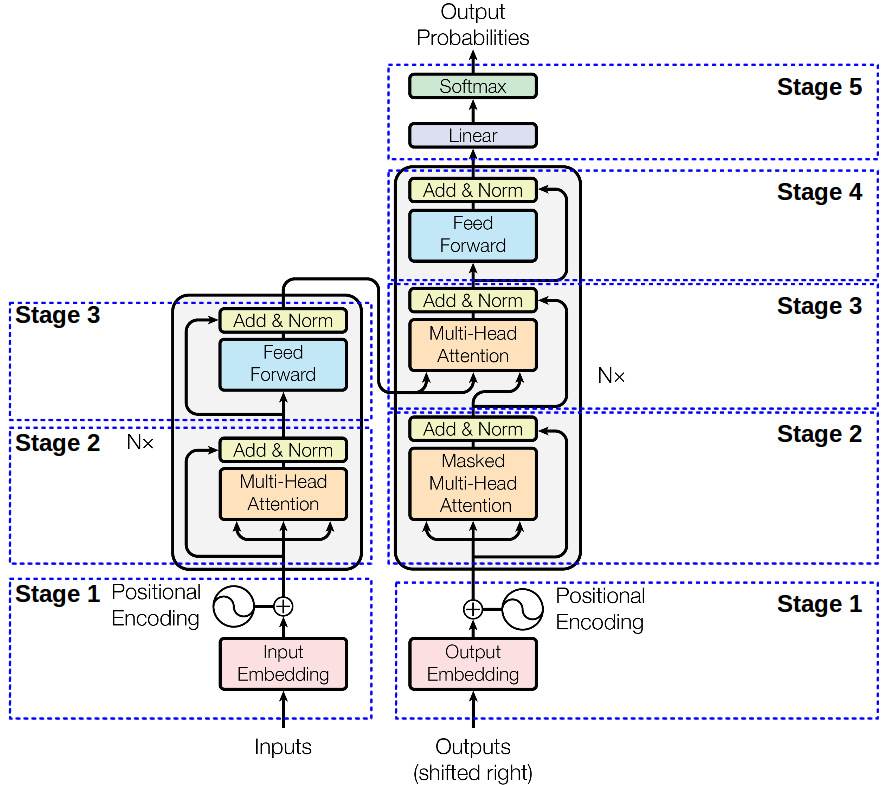


In [ ]:
#基于pytorch写一个完整的Transformer

It seems that the code is encountering issues with accessing the `torch` library. To resolve this, make sure that the `torch` library is properly installed and imported at the beginning of the code. Here's an example of how to import `torch` and create a simple Transformer model using PyTorch:


In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Transformer(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, num_layers):
        super(Transformer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_heads = num_heads
        self.num_layers = num_layers

        # Define the layers of the Transformer model
        self.embedding = nn.Embedding(input_dim, output_dim)
        self.positional_encoding = PositionalEncoding(output_dim)
        self.encoder_layers = nn.ModuleList([EncoderLayer(output_dim, num_heads) for _ in range(num_layers)])
        self.linear = nn.Linear(output_dim, input_dim)

    def forward(self, x):
        # Embed the input sequence and add positional encoding
        x = self.embedding(x) * torch.sqrt(torch.tensor(self.output_dim, dtype=torch.float))
        x = self.positional_encoding(x)

        # Pass the input through the encoder layers
        for layer in self.encoder_layers:
            x = layer(x)

        # Linear transformation to get the output sequence
        x = self.linear(x)
        return x

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        return x + self.encoding[:, :x.size(1)]

class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiheadAttention(d_model, num_heads)
        self.linear1 = nn.Linear(d_model, 4 * d_model)
        self.linear2 = nn.Linear(4 * d_model, d_model)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        # Apply self-attention and layer normalization
        x = self.norm1(x + self.self_attn(x, x, x))

        # Apply position-wise feedforward network and layer normalization
        x = self.norm2(x + self.linear2(F.relu(self.linear1(x))))
        return x

class MultiheadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiheadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        self.depth = d_model // num_heads

        self.wq = nn.Linear(d_model, d_model)
        self.wk = nn.Linear(d_model, d_model)
        self.wv = nn.Linear(d_model, d_model)
        self.fc = nn.Linear(d_model, d_model)

    def forward(self, query, key, value):
        # Split the input into multiple heads
        query, key, value = [self.split_heads(x) for x in (query, key, value)]

        # Apply scaled dot-product attention
        attention_scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(self.depth)
        attention_probs = F.softmax(attention_scores, dim=-1)
        attention_output = torch.matmul(attention_probs, value)

        # Merge the heads and apply the final linear transformation
        attention_output = self.combine_heads(attention_output)
        return self.fc(attention_output)

    def split_heads(self, x):
        batch_size, seq_len, _ = x.size()
        x = x.view(batch_size, seq_len, self.num_heads, self.depth)
        return x.permute(0, 2, 1, 3)

    def combine_heads(self, x):
        batch_size, _, seq_len, _ = x.size()
        x = x.permute(0, 2, 1, 3).contiguous()
        return x.view(batch_size, seq_len, self.d_model)

# Example usage
input_dim = 1000
output_dim = 512
num_heads = 8
num_layers = 6
model = Transformer(input_dim, output_dim, num_heads, num_layers)
input_sequence = torch.tensor([[1, 2, 3, 4, 5]])
output_sequence = model(input_sequence)
print(output_sequence)

NameError: name 'math' is not defined

In this example, a simple Transformer model is defined using PyTorch, including the EncoderLayer, MultiheadAttention, and PositionalEncoding components. The model is then instantiated and used to process an input sequence. Make sure to have the necessary imports and ensure that the `torch` library is properly installed in your environment.

In [4]:
## from https://github.com/graykode/nlp-tutorial/tree/master/5-1.Transformer

import numpy as np  # noqa: F811
import torch  # noqa: F811
import torch.nn as nn
import torch.optim as optim
import math


def make_batch(sentences):
    """
    将原始文本数据预处理成神经网络可以处理的格式的典型例子
    :param sentences:输入句子、输出句子和目标句子
    :return:句子中单词在词汇表中的索引
    """
    input_batch = [[src_vocab[n] for n in sentences[0].split()]]
    output_batch = [[tgt_vocab[n] for n in sentences[1].split()]]
    target_batch = [[tgt_vocab[n] for n in sentences[2].split()]]
    return (
        torch.LongTensor(input_batch),
        torch.LongTensor(output_batch),
        torch.LongTensor(target_batch),
    )


## 10
def get_attn_subsequent_mask(seq):
    """
    生成“后续掩码”，防止模型在预测序列中的元素时“偷看”到后续的元素
    seq: [batch_size, tgt_len]  seq序列张量的维度 批次大小*目标序列长度
    """
    attn_shape = [seq.size(0), seq.size(1), seq.size(1)]
    # attn_shape: [batch_size, tgt_len, tgt_len] 注意力矩阵的形状
    subsequence_mask = np.triu(
        np.ones(attn_shape), k=1
    )  # 生成一个上三角符号矩阵，对角线下全是0，上是1，保证每个元素看不到其后面的元素
    subsequence_mask = torch.from_numpy(
        subsequence_mask
    ).byte()  # NumPy数组->Torch 张量->布尔类型
    return subsequence_mask  # [batch_size, tgt_len, tgt_len]


## 7. ScaledDotProductAttention
class ScaledDotProductAttention(nn.Module):
    def __init__(self):
        # 初始化 ScaledDotProductAttention 类的实例，并确保它作为 nn.Module 的子类拥有所有必要的功能和特性
        super(ScaledDotProductAttention, self).__init__()

    def forward(self, Q, K, V, attn_mask):
        """
        缩放点乘计算注意力分数，结合mask
        留下一个小小的疑惑，encoder
        """
        ## 输入进来的维度分别是 [batch_size x n_heads x len_q x d_k]  K： [batch_size x n_heads x len_k x d_k]  V: [batch_size x n_heads x len_k x d_v]
        ##首先经过matmul函数得到的scores形状是 : [batch_size x n_heads x len_q x len_k]
        scores = torch.matmul(Q, K.transpose(-1, -2)) / np.sqrt(d_k)

        ## 然后关键地方来了，下面这个就是用到了我们之前重点讲的attn_mask，把被mask的地方置为无限小，softmax之后基本就是0，对q的单词不起作用
        scores.masked_fill_(
            attn_mask, -1e9
        )  # Fills elements of self tensor with value where mask is one.
        attn = nn.Softmax(dim=-1)(scores)
        context = torch.matmul(attn, V)
        return context, attn


## 6. MultiHeadAttention
class MultiHeadAttention(nn.Module):
    def __init__(self):
        super(MultiHeadAttention, self).__init__()
        ## 输入进来的QKV是相等的，我们会使用映射linear做一个映射得到参数矩阵Wq, Wk,Wv
        self.W_Q = nn.Linear(d_model, d_k * n_heads)
        self.W_K = nn.Linear(d_model, d_k * n_heads)
        self.W_V = nn.Linear(d_model, d_v * n_heads)
        self.linear = nn.Linear(n_heads * d_v, d_model)
        self.layer_norm = nn.LayerNorm(d_model)

    def forward(self, Q, K, V, attn_mask):
        ## 这个多头分为这几个步骤，首先映射分头，然后计算atten_scores，然后计算atten_value;
        ##输入进来的数据形状： Q: [batch_size x len_q x d_model], K: [batch_size x len_k x d_model], V: [batch_size x len_k x d_model]
        residual, batch_size = Q, Q.size(0)
        # (B, S, D) -proj-> (B, S, D) -split-> (B, S, H, W) -trans-> (B, H, S, W)

        ##下面这个就是先映射，后分头；一定要注意的是q和k分头之后维度是一致额，所以一看这里都是dk
        q_s = (
            self.W_Q(Q).view(batch_size, -1, n_heads, d_k).transpose(1, 2)
        )  # q_s: [batch_size x n_heads x len_q x d_k]
        k_s = (
            self.W_K(K).view(batch_size, -1, n_heads, d_k).transpose(1, 2)
        )  # k_s: [batch_size x n_heads x len_k x d_k]
        v_s = (
            self.W_V(V).view(batch_size, -1, n_heads, d_v).transpose(1, 2)
        )  # v_s: [batch_size x n_heads x len_k x d_v]

        ## 输入进行的attn_mask形状是 batch_size x len_q x len_k，然后经过下面这个代码得到 新的attn_mask : [batch_size x n_heads x len_q x len_k]，就是把pad信息重复了n个头上
        attn_mask = attn_mask.unsqueeze(1).repeat(
            1, n_heads, 1, 1
        )  # 代码的意思是先在第二个维度上增加一个维度，然后这个维度重复n_heads次

        ##然后我们计算 ScaledDotProductAttention 这个函数，去7.看一下
        ## 得到的结果有两个：context: [batch_size x n_heads x len_q x d_v], attn: [batch_size x n_heads x len_q x len_k]
        context, attn = ScaledDotProductAttention()(q_s, k_s, v_s, attn_mask)
        context = (
            context.transpose(1, 2).contiguous().view(batch_size, -1, n_heads * d_v)
        )  # context: [batch_size x len_q x n_heads * d_v]
        output = self.linear(context)
        return self.layer_norm(
            output + residual
        ), attn  # output: [batch_size x len_q x d_model]


## 8. PoswiseFeedForwardNet
# 全连接前馈网络 这里Conv用作线性变换
class PoswiseFeedForwardNet(nn.Module):
    def __init__(self):
        super(PoswiseFeedForwardNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=d_model, out_channels=d_ff, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=d_ff, out_channels=d_model, kernel_size=1)
        self.layer_norm = nn.LayerNorm(
            d_model
        )  # 层归一化在 Transformer中常用于稳定训练过程

    def forward(self, inputs):
        residual = inputs  # inputs : [batch_size, len_q, d_model]
        output = nn.ReLU()(
            self.conv1(inputs.transpose(1, 2))
        )  # 换一下维度，因为卷积核期望输入维度为[batch_size, channels, length]
        output = self.conv2(output).transpose(1, 2)  # 维度换回来
        return self.layer_norm(output + residual)  # 残差连接+归一化


## 4. get_attn_pad_mask

## 比如说，我现在的句子长度是5，在后面注意力机制的部分，我们在计算出来QK转置除以根号之后，softmax之前，我们得到的形状
## len_input * len_input  代表每个单词对其余包含自己的单词的影响力

## 所以这里我需要有一个同等大小形状的矩阵(符号矩阵)，告诉我哪个位置是PAD部分，之后在计算softmax之前会把这里置为无穷大；

## 一定需要注意的是这里得到的矩阵形状是batch_size x len_q x len_k，我们是对k中的pad符号进行标识，并没有对q中的做标识，因为与q无关。
## 所以在解码器的交叉注意力block（不是self-att block）需要pad标识的时候，需要来自编码器的k

## seq_q 和 seq_k 不一定一致，在交互注意力，q来自解码端，k来自编码端，所以告诉模型编码这边pad符号信息就可以，解码端的pad信息在交互注意力层是没有用到的；


# 这里的"填充掩码"不同于前面的"后续掩码"，这里是用于标记填充的pad的，后续掩码只有解码器中的自注意力block需要
def get_attn_pad_mask(seq_q, seq_k):
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    # eq(zero) is PAD token 通常0是pad
    pad_attn_mask = seq_k.data.eq(
        0
    ).unsqueeze(
        1
    )  # batch_size x 1 x len_k, one is masking  扩充一个维度，让掩码能和注意力分数维度匹配
    return pad_attn_mask.expand(batch_size, len_q, len_k)  # batch_size x len_q x len_k


## 3. PositionalEncoding 代码实现
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()

        ## 位置编码的实现其实很简单，直接对照着公式去敲代码就可以，下面这个代码只是其中一种实现方式；
        ## 从理解来讲，需要注意的就是偶数和奇数在公式上有一个共同部分，我们使用log函数把次方拿下来，方便计算；
        ## pos代表的是单词在句子中的索引，这点需要注意；比如max_len是128个，那么索引就是从0，1，2，...,127
        ##假设我的demodel是512，2i那个符号中i从0取到了255，那么2i对应取值就是0,2,4...510
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model)
        )
        pe[:, 0::2] = torch.sin(
            position * div_term
        )  ## 这里需要注意的是pe[:, 0::2]这个用法，就是从0开始到最后面，补长为2，其实代表的就是偶数位置
        pe[:, 1::2] = torch.cos(
            position * div_term
        )  ##这里需要注意的是pe[:, 1::2]这个用法，就是从1开始到最后面，补长为2，其实代表的就是奇数位置
        ## 上面代码获取之后得到的pe:[max_len*d_model]

        ## 下面这个代码之后，我们得到的pe形状是：[max_len*1*d_model]
        pe = pe.unsqueeze(0).transpose(0, 1)

        self.register_buffer(
            "pe", pe
        )  ## 定一个缓冲区，其实简单理解为这个参数不更新就可以

    def forward(self, x):
        """
        x: [seq_len, batch_size, d_model]
        """
        x = x + self.pe[: x.size(0), :]
        return self.dropout(x)


## 5. EncoderLayer ：包含两个部分，多头注意力机制和前馈神经网络
class EncoderLayer(nn.Module):
    def __init__(self):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention()
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, enc_inputs, enc_self_attn_mask):
        ## 下面这个就是做自注意力层，输入是enc_inputs，形状是[batch_size x seq_len_q x d_model] 需要注意的是最初始的QKV矩阵是等同于这个输入的，去看一下enc_self_attn函数 6.
        enc_outputs, attn = self.enc_self_attn(
            enc_inputs, enc_inputs, enc_inputs, enc_self_attn_mask
        )  # enc_inputs to same Q,K,V
        enc_outputs = self.pos_ffn(
            enc_outputs
        )  # enc_outputs: [batch_size x len_q x d_model]
        return enc_outputs, attn


## 2. Encoder 部分包含三个部分：词向量embedding，位置编码部分，注意力层及后续的前馈神经网络


class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.src_emb = nn.Embedding(
            src_vocab_size, d_model
        )  ## 这个其实就是去定义生成一个矩阵，大小是 src_vocab_size * d_model
        self.pos_emb = PositionalEncoding(
            d_model
        )  ## 位置编码情况，这里是固定的正余弦函数，也可以使用类似词向量的nn.Embedding获得一个可以更新学习的位置编码
        self.layers = nn.ModuleList(
            [EncoderLayer() for _ in range(n_layers)]
        )  ## 使用ModuleList对多个encoder进行堆叠，因为后续的encoder并没有使用词向量和位置编码，所以抽离出来；

    def forward(self, enc_inputs):
        ## 这里我们的 enc_inputs 形状是： [batch_size x source_len]

        ## 下面这个代码通过src_emb，进行索引定位，enc_outputs输出形状是[batch_size, src_len, d_model]  词嵌入
        enc_outputs = self.src_emb(enc_inputs)

        ## 这里就是位置编码，把两者相加放入到了这个函数里面，从这里可以去看一下位置编码函数的实现；3.
        enc_outputs = self.pos_emb(enc_outputs.transpose(0, 1)).transpose(
            0, 1
        )  # 这里的维度交换，可能是因为序列长度在第一个维度

        ##get_attn_pad_mask是为了得到句子中pad的位置信息，给到模型后面，在计算自注意力和交互注意力的时候去掉pad符号的影响，去看一下这个函数 4.
        enc_self_attn_mask = get_attn_pad_mask(enc_inputs, enc_inputs)
        enc_self_attns = []
        for layer in self.layers:
            ## 去看EncoderLayer 层函数 5.
            enc_outputs, enc_self_attn = layer(enc_outputs, enc_self_attn_mask)
            enc_self_attns.append(enc_self_attn)
        return enc_outputs, enc_self_attns


## 10.
class DecoderLayer(nn.Module):
    def __init__(self):
        super(DecoderLayer, self).__init__()
        self.dec_self_attn = MultiHeadAttention()  # 解码器
        self.dec_enc_attn = MultiHeadAttention()  # 编码器-解码器
        self.pos_ffn = PoswiseFeedForwardNet()

    def forward(self, dec_inputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask):
        # 解码器的自注意力层处理解码器输入（dec_inputs），同时使用后续掩码（dec_self_attn_mask）防止“偷看”未来的信息。
        dec_outputs, dec_self_attn = self.dec_self_attn(
            dec_inputs, dec_inputs, dec_inputs, dec_self_attn_mask
        )
        # 编码器-解码器注意力层将解码器自注意力的输出（dec_outputs）作为查询，编码器的输出（enc_outputs）作为键和值，并利用掩码（dec_enc_attn_mask）
        dec_outputs, dec_enc_attn = self.dec_enc_attn(
            dec_outputs, enc_outputs, enc_outputs, dec_enc_attn_mask
        )
        # 全连接前馈网络
        dec_outputs = self.pos_ffn(dec_outputs)
        return dec_outputs, dec_self_attn, dec_enc_attn


## 9. Decoder


class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.tgt_emb = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_emb = PositionalEncoding(d_model)
        self.layers = nn.ModuleList([DecoderLayer() for _ in range(n_layers)])

    def forward(
        self, dec_inputs, enc_inputs, enc_outputs
    ):  # dec_inputs : [batch_size x target_len] enc_inputs这个应该只是为了告诉哪些是pad符号
        dec_outputs = self.tgt_emb(dec_inputs)  # [batch_size, tgt_len, d_model]
        dec_outputs = self.pos_emb(dec_outputs.transpose(0, 1)).transpose(
            0, 1
        )  # [batch_size, tgt_len, d_model]

        ## get_attn_pad_mask 自注意力层的时候的pad 部分 得到一个符号矩阵 pad的地方是1
        dec_self_attn_pad_mask = get_attn_pad_mask(dec_inputs, dec_inputs)

        ## get_attn_subsequent_mask 这个做的是自注意层的mask部分，就是当前单词之后看不到，使用一个上三角为1的矩阵
        dec_self_attn_subsequent_mask = get_attn_subsequent_mask(dec_inputs)

        ## 两个矩阵相加，大于0的为1，不大于0的为0，为1的在之后就会被fill到无限小  填充掩码和后续掩码矩阵相加
        dec_self_attn_mask = torch.gt(
            (dec_self_attn_pad_mask + dec_self_attn_subsequent_mask), 0
        )

        ## 这个做的是交互注意力机制中的mask矩阵，enc的输入是k，我去看这个k里面哪些是pad符号，给到后面的模型；注意哦，我q肯定也是有pad符号，但是这里我不在意的，之前说了好多次了哈
        dec_enc_attn_mask = get_attn_pad_mask(dec_inputs, enc_inputs)

        dec_self_attns, dec_enc_attns = [], []
        for layer in self.layers:
            dec_outputs, dec_self_attn, dec_enc_attn = layer(
                dec_outputs, enc_outputs, dec_self_attn_mask, dec_enc_attn_mask
            )
            dec_self_attns.append(dec_self_attn)
            dec_enc_attns.append(dec_enc_attn)
        return dec_outputs, dec_self_attns, dec_enc_attns


## 1. 从整体网路结构来看，分为三个部分：编码层，解码层，输出层
class Transformer(nn.Module):
    def __init__(self):
        super(Transformer, self).__init__()
        self.encoder = Encoder()  ## 编码层
        self.decoder = Decoder()  ## 解码层
        self.projection = nn.Linear(
            d_model, tgt_vocab_size, bias=False
        )  ## 输出层 d_model 是我们解码层每个token输出的维度大小，之后会做一个 tgt_vocab_size 大小的softmax

    def forward(self, enc_inputs, dec_inputs):
        ## 这里有两个数据进行输入，一个是enc_inputs 形状为[batch_size, src_len]，主要是作为编码段的输入，一个dec_inputs，形状为[batch_size, tgt_len]，主要是作为解码端的输入

        ## enc_inputs作为输入 形状为[batch_size, src_len]，输出由自己的函数内部指定，想要什么指定输出什么，可以是全部tokens的输出，可以是特定每一层的输出；也可以是中间某些参数的输出；
        ## enc_outputs就是主要的输出，enc_self_attns这里没记错的是QK转置相乘之后softmax之后的矩阵值，代表的是每个单词和其他单词相关性；
        enc_outputs, enc_self_attns = self.encoder(enc_inputs)

        ## dec_outputs 是decoder主要输出，用于后续的linear映射； dec_self_attns类比于enc_self_attns 是查看每个单词对decoder中输入的其余单词的相关性；dec_enc_attns是decoder中每个单词对encoder中每个单词的相关性；
        dec_outputs, dec_self_attns, dec_enc_attns = self.decoder(
            dec_inputs, enc_inputs, enc_outputs
        )

        ## dec_outputs做映射到词表大小
        dec_logits = self.projection(
            dec_outputs
        )  # dec_logits : [batch_size x src_vocab_size x tgt_vocab_size]
        return (
            dec_logits.view(-1, dec_logits.size(-1)),
            enc_self_attns,
            dec_self_attns,
            dec_enc_attns,
        )


if __name__ == "__main__":
    ## 句子的输入部分，
    sentences = ["ich mochte ein bier P", "S i want a beer", "i want a beer E"]

    # Transformer Parameters
    # Padding Should be Zero
    ## 构建词表
    src_vocab = {"P": 0, "ich": 1, "mochte": 2, "ein": 3, "bier": 4}
    src_vocab_size = len(src_vocab)

    tgt_vocab = {"P": 0, "i": 1, "want": 2, "a": 3, "beer": 4, "S": 5, "E": 6}
    tgt_vocab_size = len(tgt_vocab)

    src_len = 5  # length of source
    tgt_len = 5  # length of target

    ## 模型参数
    d_model = 512  # Embedding Size
    d_ff = 2048  # FeedForward dimension
    d_k = d_v = 64  # dimension of K(=Q), V
    n_layers = 6  # number of Encoder of Decoder Layer
    n_heads = 8  # number of heads in Multi-Head Attention

    model = Transformer()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    enc_inputs, dec_inputs, target_batch = make_batch(sentences)

    for epoch in range(100):
        optimizer.zero_grad()
        outputs, enc_self_attns, dec_self_attns, dec_enc_attns = model(
            enc_inputs, dec_inputs
        )
        loss = criterion(outputs, target_batch.contiguous().view(-1))
        print("Epoch:", "%04d" % (epoch + 1), "cost =", "{:.6f}".format(loss))
        loss.backward()
        optimizer.step()

Epoch: 0001 cost = 2.219696
Epoch: 0002 cost = 1.998770
Epoch: 0003 cost = 3.462514
Epoch: 0004 cost = 5.429219
Epoch: 0005 cost = 5.097950
Epoch: 0006 cost = 3.988117
Epoch: 0007 cost = 3.123253
Epoch: 0008 cost = 2.702720
Epoch: 0009 cost = 2.569156
Epoch: 0010 cost = 2.323125
Epoch: 0011 cost = 1.908080
Epoch: 0012 cost = 1.653514
Epoch: 0013 cost = 1.766750
Epoch: 0014 cost = 1.961833
Epoch: 0015 cost = 1.962594
Epoch: 0016 cost = 1.846377
Epoch: 0017 cost = 1.734079
Epoch: 0018 cost = 1.665266
Epoch: 0019 cost = 1.639971
Epoch: 0020 cost = 1.652241
Epoch: 0021 cost = 1.686438
Epoch: 0022 cost = 1.719732
Epoch: 0023 cost = 1.733663
Epoch: 0024 cost = 1.721813
Epoch: 0025 cost = 1.690359
Epoch: 0026 cost = 1.653048
Epoch: 0027 cost = 1.623911
Epoch: 0028 cost = 1.611254
Epoch: 0029 cost = 1.615243
Epoch: 0030 cost = 1.629387
Epoch: 0031 cost = 1.644478
Epoch: 0032 cost = 1.652884
Epoch: 0033 cost = 1.651285
Epoch: 0034 cost = 1.641250
Epoch: 0035 cost = 1.627767
Epoch: 0036 cost = 1

In [11]:
target_batch

tensor([[1, 2, 3, 4, 6]])

In [8]:
enc_inputs

tensor([[1, 2, 3, 4, 0]])

GNN

RNN

KAN

<!-- @format -->

## 4. <a id='toc4_'></a>[结论与讨论](#toc0_)
